# Superposition of Monochromatic Waves
As you noticed, the waves that composed a wave field have different wavelength and directions. In nature, a monochromatic wave field is not realistic. Let's start with two wave trains. 

What looks like a wave field with two waves with similar frequencies (wavenumbers)? 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def carrier_wave_one_env(a,L_port,delta_k,n):
    """
    Purpose:
    --------
    create a synthetic SSH 1D field with one env and one carrier wave,
    The wavelength (L and L_env) are in meter,
    Inputs:
    --------
    Outputs:
    --------
    """
    x = np.arange(0, n, 1) # along-track coordinate\n",
    k = 2 * np.pi / L_port

    zeta = a * np.cos(k * x) + a * np.cos((k + delta_k) * x)
    # + a * np.cos((k + delta_k * 2) * x
    return x,zeta

In [3]:
a = 1 # the wave amplitude
L_port = 100 # wavelength of the carrier waves
delta_k = 0.01 # the slight deviation in wavenumber around the carrier
n = 5000 # length of the x-axis in meter
x, zeta = carrier_wave_one_env(a, L_port, delta_k, n)
x0 = 1000

Text(0, 0.5, 'Amplitude [meter]')

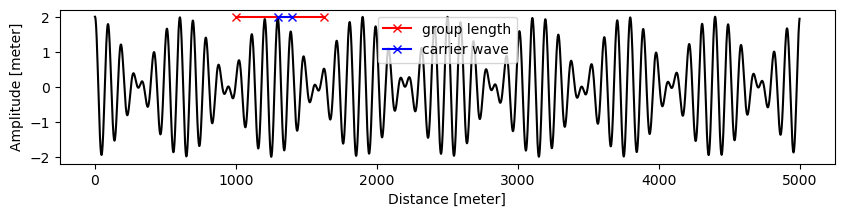

In [4]:
fig, ax = plt.subplots(figsize = (10, 2))
ax.plot(x, zeta, color = 'k')
ax.plot([x0, x0+2*np.pi/delta_k], [2*a, 2*a], color = 'r', label = 'group length', marker = 'x')
ax.plot([x0+3*L_port, x0+4*L_port], [2*a, 2*a], color = 'b', label = 'carrier wave', marker = 'x')

ax.legend()
ax.set_xlabel('Distance [meter]')
ax.set_ylabel('Amplitude [meter]')


We can see that two waves with close frequencies organized themself into *groups* with an amplitude equal to the sum of the individual wave amplitude. The group length is equal to $2\pi/\Delta k$. Therefore the smaller $\Delta k$ the longer the *group* (i.e. the number of wave per groups). Note that the carrier wave keeps the same wavelength.

### Let's create a more realistic wave field.
Instead of combining only two waves, we will superimpose hundrededs of waves with different wavenumber *bandwidths*

In [5]:
delta_k_vec = np.logspace(-7, 100, 30) # the bandwidths axis
k = 2*np.pi/L_port # the carrier waves
x0 = 100

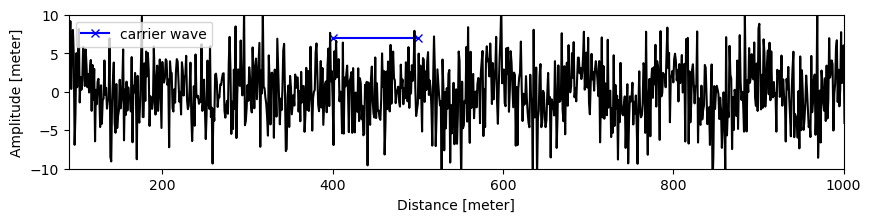

In [6]:
fig, ax = plt.subplots(figsize = (10, 2))
zeta = a * np.sum(np.cos((k + delta_k_vec[:, None]) * x[None, :]), axis=0)
ax.plot([x0+3*L_port, x0+4*L_port], [7*a, 7*a], color = 'b', label = 'carrier wave', marker = 'x')
plt.plot(x, zeta, color = 'k')
plt.xlim([x0-10, 1000])
plt.ylim([-10, 10])
ax.set_xlabel('Distance [meter]')
ax.set_ylabel('Amplitude [meter]')
ax.legend()

Here we still see the carrier waves but the group modulation is much less visible. Also there are tons of oscillation at wavelength shorter than the carrier wave. Note that the wave amplitude here is unrealistic for SGW. Indeed, we kept the same amplitude for all the superposed waves, which is not true in nature. Now the question is: **How can we describe such wave signal?**
 - Is there a way to quantify the wavelengths that composed the signal?
 - How height the wave are according to their wavelength?
 - What is the good proxi to describe the amplitude of such wave field?